# Quotient Operators for Weighted Rational Expressions
This page is a complement to our submission to LATA 2017.  This page exists in several forms:
- [A Dynamic Notebook](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/LATA-2017.ipynb), which can be edited, played with
- [A static HTML page](http://www.lrde.epita.fr/dload/vcsn/latest/notebooks/LATA-2017.html), whose graphical rendering is always correct.

More information is available here:
- [Documentation for _expression_.expansion](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.expansion.ipynb)
- [Documentation for _expression_.derived_term](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.derived_term.ipynb)
- [Documentation of Vcsn](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/!Read-me-first.ipynb)
- [Vcsn's web page](http://vcsn.lrde.epita.fr)

You may change the cells, and run then.  To run a cell in a notebook, hit "Control-Enter" (in which case the focus stays on the same cell) or "Shift-Enter" (focus goes to the next cell).  Beware that depending on the requested operations, Vcsn may generate and compile code, which may be a really slow process on small machines (about a minute): be patient!  However, the code is compiled only once: successive uses will be way faster.

To run all the cells anew, select "Restart & Run All" in the "Kernel" menu above.

In [1]:
import sys
import vcsn

## Section 2, Notations

First we introduce the "context" we are interested in: labels are letter-or-empty-word ("lal"), values are rational numbers.

In [2]:
Q = vcsn.context('lal, q')
Q

{...}? -> Q

### Expressions
The rational expressions in Vcsn supports several operators beyond the classical ones.  See [Expressions](Expressions.ipynb) for all the details.  The following examples should be self-explanatory.

In [3]:
e1 = Q.expression('[ab]'); e1

a+b

In [4]:
e1.star()

(a+b)*

In [5]:
2 * e1 + e1 * e1.star()

<2>(a+b)+(a+b)(a+b)*

### Expansions
One can play with the different operations on expansions.  However, there is no direct means to enter an expansion, one has to compute the expansion of an expression.

In [6]:
e1 = Q.expression('ab')
x1 = e1.expansion()
x1

a.[b]

In [7]:
e2 = Q.expression('[ab]*')
x2 = e2.expansion()
x2

<1> + a.[(a+b)*] + b.[(a+b)*]

The left-quotient is denoted `{\}` in the syntax of Vcsn's expressions, but we use Python's operator `//` to denote it.  So `e // f` denotes `e {\} f`.

In [8]:
x2 // x1

\e.[ab + (a+b)*{\}b]

In [9]:
x1 // x2

\e.[ab{\}\e + b{\}(a+b)*]

### Derivative
Although not covered in the paper, Vcsn does support the derivatives.  However, the quotient operator is not supported.

In [10]:
e = Q.expression('<2>[ab]*')
e

<2>(a+b)*

In [11]:
e.constant_term()

2

In [12]:
e.derivation('a')

<2>(a+b)*

In [13]:
e.derivation('b')

<2>(a+b)*

Those three facts, constant term and derivative wrt $a$ and $b$, are fully captured by this expansion.

In [14]:
e.expansion()

<2> + a.[<2>(a+b)*] + b.[<2>(a+b)*]

## Example $\mathsf{E}_1$: A Simple Expression

In Vcsn, the left-quotient is written `{\}` (because the backslash character is used to escape operators, e.g., `\*` denotes the letter `*`, not the Kleene star).
The expression $\mathsf{E}_1$ is therefore:

In [15]:
e1 = Q.expression('(<2>a) {\} (<3>[ab] + <5>aa* + <7>ab*) + <11>ab*')
e1

<11>(ab*)+<2>a{\}(<3>(a+b)+<5>(aa*)+<7>(ab*))

Its expansion is (contrary to the paper, the empty expression is denoted $\varepsilon$ instead of $\mathsf{1}$):

In [16]:
e1.expansion()

<3/2> + \e.[<5/2>a* + <7/2>b*] + a.[<11>b*]

For sake of performance, the constant term is actually kept separate in our implementation of expansions.  The previous result, rewritten in the style of the paper, is exactly the same:

$$
\left\langle \frac{3}{2}\right\rangle  \oplus \varepsilon \odot \left[\left\langle \frac{5}{2}\right\rangle {a}^{*} \oplus \left\langle \frac{7}{2}\right\rangle {b}^{*}\right] \oplus a \odot \left[\left\langle 11\right\rangle {b}^{*}\right]
=
 \varepsilon \odot \left[
    \left\langle \frac{3}{2}\right\rangle \odot \varepsilon
    \oplus \left\langle \frac{5}{2}\right\rangle \odot {a}^{*}
    \oplus \left\langle \frac{7}{2}\right\rangle \odot {b}^{*}\right]
 \oplus a \odot \left[\left\langle 11\right\rangle \odot {b}^{*}\right]
$$

The derived-term automaton of $\mathsf{E}_1$, $\mathcal{A}_{\mathsf{E}_1}$, is:

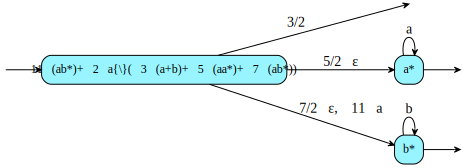

In [17]:
a1 = e1.derived_term()
a1

## Example 5: Not all the States are Coaccessible

In [18]:
e = Q.expression('(<2>ab {\} ab*)*')
e

(<2>(ab){\}ab*)*

In [19]:
e.expansion()

<1> + \e.[<1/2>(b{\}b*)(<2>(ab){\}ab*)*]

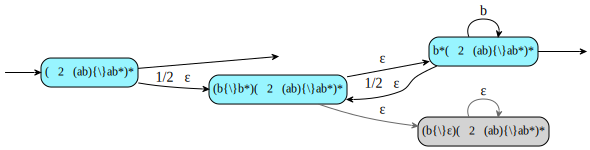

In [20]:
a = e.derived_term()
a

As such, this automaton in $\mathbb{Q}$ is invalid: it contains a spontaneous loop whose weight, 1, is not starrable.

In [21]:
a.is_valid()

False

Once trimmed, it is valid though, and its spontaneous transitions may be removed.

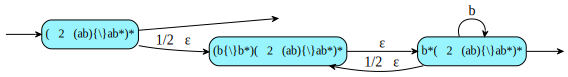

In [22]:
a.trim()

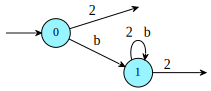

In [23]:
a.trim().proper()

A (basic) rational expression is therefore:

In [24]:
a.trim().proper().expression()

<2>\e+<2>(b(<2>b)*)

## Example 6
The following expression in invalid in $\mathbb{Q}$, but valid in $\mathbb{B}$.

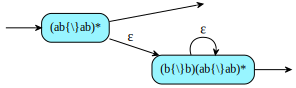

In [25]:
e = Q.expression('(ab {\} ab)*')
a = e.derived_term()
a

In [26]:
a.is_valid()

False

This is because the weight of the spontaneous cycle, 1, is not starrable:

In [27]:
w = Q.weight('1')
w

1

In [28]:
try:
    w.star()
except RuntimeError as e:
    print(e, file=sys.stderr)

Q: value is not starrable: 1


But in $\mathbb{B}$, it is well defined:

In [29]:
B = vcsn.context('lal, b')
B

{...}? -> B

In [30]:
w = B.weight('1')
w

1

In [31]:
w.star()

1

Hence the automaton is valid.

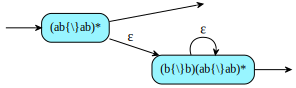

In [32]:
e = B.expression('(ab {\} ab)*')
a = e.derived_term()
a

In [33]:
a.is_valid()

True

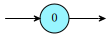

In [34]:
a.proper()

## Section 5: Transpose and Right Quotient
The right quotient is written as `{\}`, and transpose as a postfix operator `{T}`.

The following simple example shows how transpose is handled.

In [35]:
e = Q.expression('(abc)*{T}')
e

(abc)*{T}

In [36]:
e.expansion()

<1> + c.[(ab){T}(abc)*{T}]

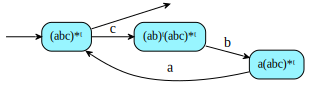

In [37]:
e.derived_term()

Then with a right quotient.

In [38]:
e = Q.expression('aba {/} ba')
e

((ba){T}{\}(aba){T}){T}

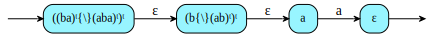

In [39]:
e.derived_term()